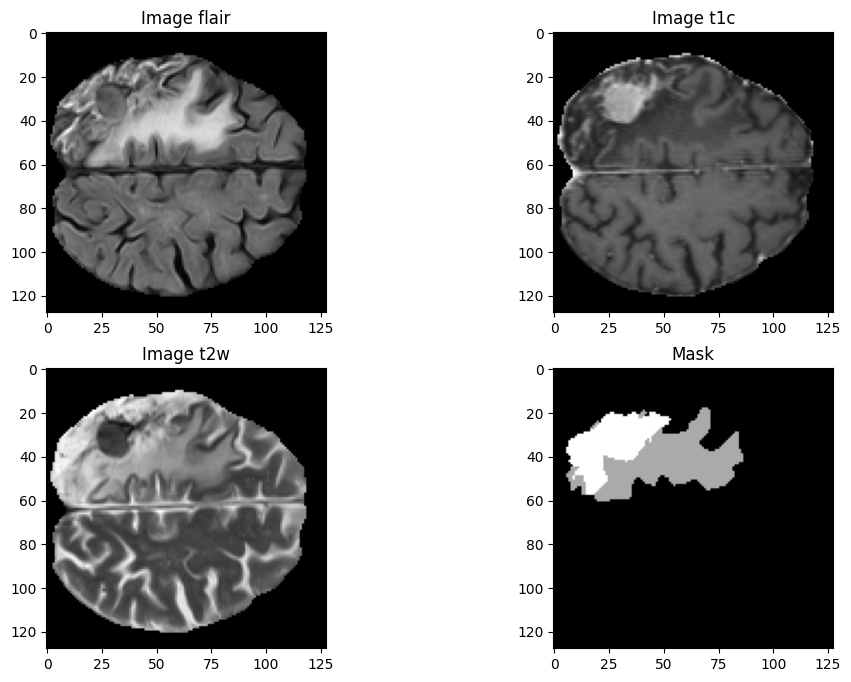

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import random

combined_x = np.load('combined-GLI-02076-100.npy')

test_mask = np.load('mask-GLI-02076-100.npy')

n_slice = random.randint(0, test_mask.shape[2])

plt.figure(figsize=(12, 8))

plt.subplot(221)
plt.imshow(combined_x[:, :, n_slice, 0], cmap='gray')
plt.title('Image flair')

plt.subplot(222)
plt.imshow(combined_x[:, :, n_slice, 1], cmap='gray')
plt.title('Image t1c')

plt.subplot(223)
plt.imshow(combined_x[:, :, n_slice, 2], cmap='gray')
plt.title('Image t2w')

plt.subplot(224)
plt.imshow(test_mask[:, :, n_slice], cmap='gray')
plt.title('Mask')

plt.show()


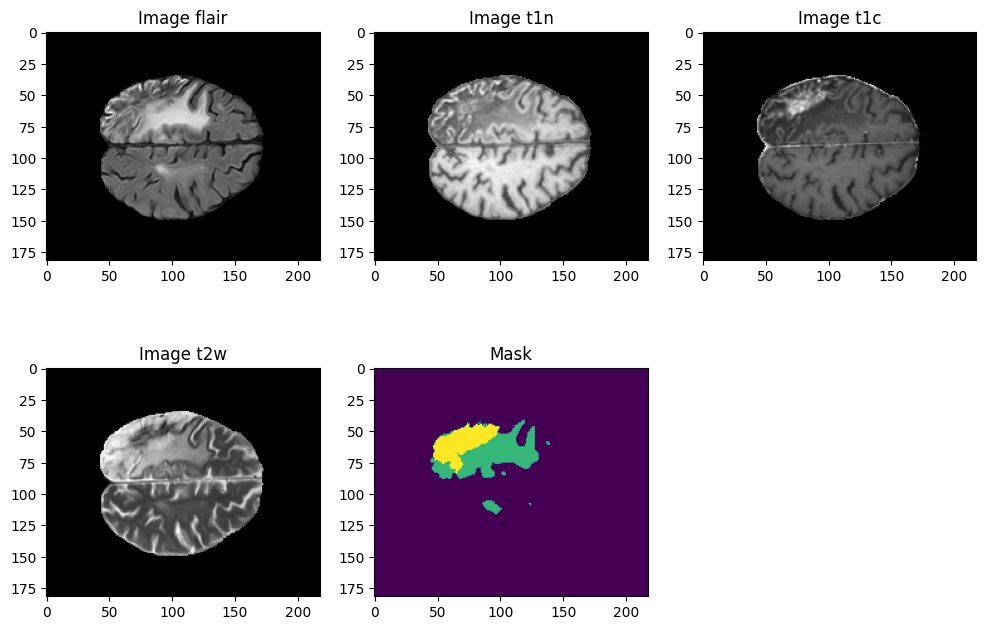

In [5]:
import numpy as np
import nibabel as nib
import glob
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import random

scaler = MinMaxScaler()

TRAIN_DATASET_PATH = 'C://Users//Romir//Desktop//Projects//BraTS//datasets//BraTS2024-BraTS-GLI-TrainingData//training_data1//'

test_image_flair = nib.load(TRAIN_DATASET_PATH + 'BraTS-GLI-02076-100//BraTS-GLI-02076-100-t2f.nii').get_fdata()
test_image_flair = scaler.fit_transform(test_image_flair.reshape(-1, test_image_flair.shape[-1])).reshape(test_image_flair.shape)

test_image_t1n = nib.load(TRAIN_DATASET_PATH + 'BraTS-GLI-02076-100//BraTS-GLI-02076-100-t1n.nii').get_fdata()
test_image_t1n = scaler.fit_transform(test_image_t1n.reshape(-1, test_image_t1n.shape[-1])).reshape(test_image_t1n.shape)

test_image_t1c = nib.load(TRAIN_DATASET_PATH + 'BraTS-GLI-02076-100//BraTS-GLI-02076-100-t1c.nii').get_fdata()
test_image_t1c = scaler.fit_transform(test_image_t1c.reshape(-1, test_image_t1c.shape[-1])).reshape(test_image_t1c.shape)

test_image_t2w = nib.load(TRAIN_DATASET_PATH + 'BraTS-GLI-02076-100//BraTS-GLI-02076-100-t2w.nii').get_fdata()
test_image_t2w = scaler.fit_transform(test_image_t2w.reshape(-1, test_image_t2w.shape[-1])).reshape(test_image_t2w.shape)

test_mask = nib.load(TRAIN_DATASET_PATH + 'BraTS-GLI-02076-100//BraTS-GLI-02076-100-seg.nii').get_fdata()
test_mask = test_mask.astype(np.uint8)
test_mask[test_mask == 4] = 3

non_zero_slices = [i for i in range(test_mask.shape[2]) if np.any(test_mask[:, :, i])]

if non_zero_slices:
    n_slice = random.choice(non_zero_slices)
else:
    n_slice = random.randint(0, test_mask.shape[2])

plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.imshow(test_image_flair[:, :, n_slice], cmap='gray')
plt.title('Image flair')
plt.subplot(232)
plt.imshow(test_image_t1n[:, :, n_slice], cmap='gray')
plt.title('Image t1n')
plt.subplot(233)
plt.imshow(test_image_t1c[:, :, n_slice], cmap='gray')
plt.title('Image t1c')
plt.subplot(234)
plt.imshow(test_image_t2w[:, :, n_slice], cmap='gray')
plt.title('Image t2w')
plt.subplot(235)
plt.imshow(test_mask[:, :, n_slice])
plt.title('Mask')
plt.show()


In [6]:
combined_x = np.stack([test_image_flair, test_image_t1c, test_image_t2w], axis=3)
print(combined_x.shape)
print(test_mask.shape)
print(test_image_flair.shape)

(182, 218, 182, 3)
(182, 218, 182)
(182, 218, 182)


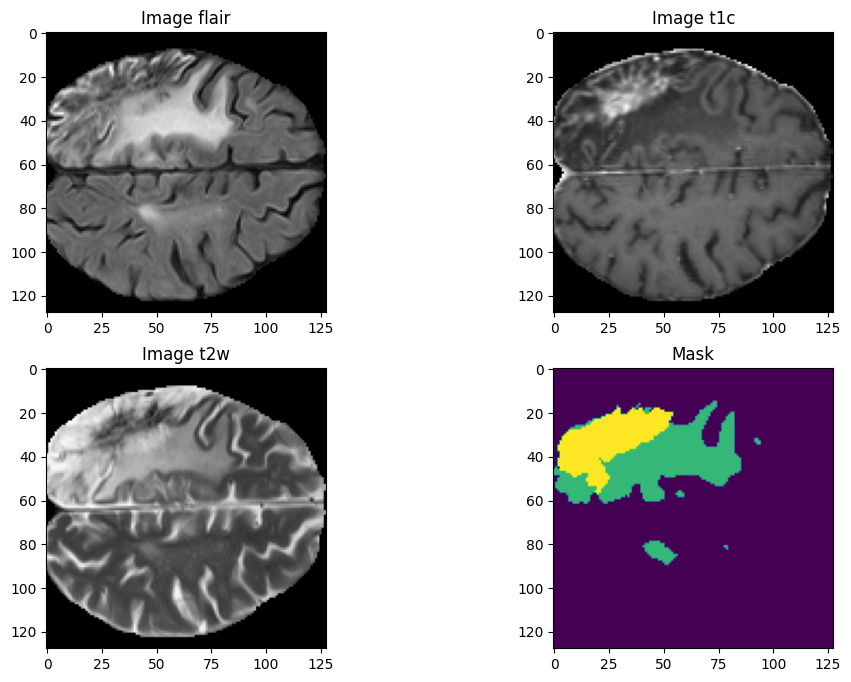

In [26]:
desired_shape = (128, 128, 128, 3)

start_x = (combined_x.shape[0] - desired_shape[0]) // 2
start_y = (combined_x.shape[1] - desired_shape[1]) // 2
start_z = (combined_x.shape[2] - desired_shape[2]) // 2

combined_x = combined_x[start_x:start_x + desired_shape[0],
                       start_y:start_y + desired_shape[1],
                       start_z:start_z + desired_shape[2], :]

desired_shape = (128, 128, 128)
start_x1 = (test_mask.shape[0] - desired_shape[0]) // 2
start_y1 = (test_mask.shape[1] - desired_shape[1]) // 2
start_z1 = (test_mask.shape[2] - desired_shape[2]) // 2

test_mask = test_mask[start_x1:start_x1 + desired_shape[0],
                       start_y1:start_y1 + desired_shape[1],
                       start_z1:start_z1 + desired_shape[2]]

n_slice=random.randint(0, test_mask.shape[2])
plt.figure(figsize=(12, 8))

plt.subplot(221)
plt.imshow(combined_x[:,:,n_slice, 0], cmap='gray')
plt.title('Image flair')
plt.subplot(222)
plt.imshow(combined_x[:,:,n_slice, 1], cmap='gray')
plt.title('Image t1c')
plt.subplot(223)
plt.imshow(combined_x[:,:,n_slice, 2], cmap='gray')
plt.title('Image t2w')
plt.subplot(224)
plt.imshow(test_mask[:,:,n_slice])
plt.title('Mask')
plt.show()